In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.shape

(300153, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


<Axes: xlabel='airline'>

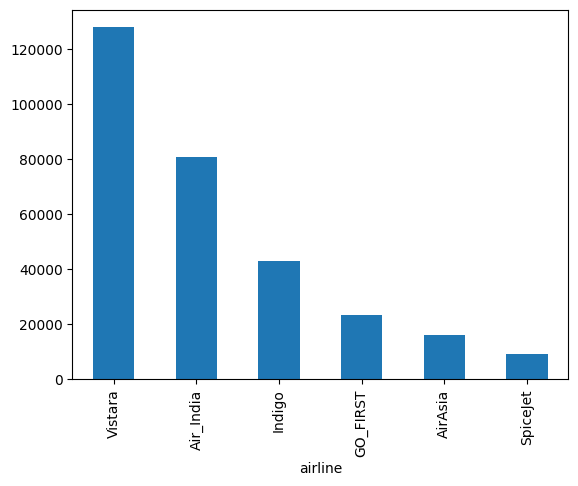

In [7]:
df['airline'].value_counts().plot(kind='bar')

In [8]:
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-3211       1
6E-6474       1
6E-2914       1
SG-1058       1
6E-2939       1
Name: count, Length: 1561, dtype: int64

In [9]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
df['one']=df['stops'].apply(lambda x:1 if 'one' in x else 0 )

In [12]:
df['zero']=df['stops'].apply(lambda x:1 if 'zero' in x else 0 )

In [13]:
df['other']=df['stops'].apply(lambda x:1 if 'two_or_more' in x else 0 )

In [14]:
df=df.drop(columns= ['stops'], axis=1)

In [15]:
df=df.drop(columns= ['Unnamed: 0'], axis=1)

In [16]:
df=df.drop(columns= ['flight'], axis=1)

In [17]:
df.sample(20)

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,one,zero,other
272223,Vistara,Kolkata,Evening,Morning,Hyderabad,Business,14.92,42,52175,1,0,0
245102,Vistara,Bangalore,Night,Afternoon,Delhi,Business,16.42,5,62793,1,0,0
247264,Vistara,Bangalore,Morning,Evening,Delhi,Business,7.42,32,54841,1,0,0
44225,Vistara,Mumbai,Early_Morning,Morning,Delhi,Economy,2.08,9,5943,0,1,0
233687,Vistara,Mumbai,Evening,Evening,Bangalore,Business,26.17,44,48213,1,0,0
37847,SpiceJet,Delhi,Early_Morning,Night,Chennai,Economy,14.00,19,4149,1,0,0
259846,Vistara,Bangalore,Night,Morning,Chennai,Business,12.75,22,60396,1,0,0
228781,Air_India,Mumbai,Early_Morning,Evening,Delhi,Business,11.67,38,47205,1,0,0
11040,Air_India,Delhi,Afternoon,Morning,Bangalore,Economy,20.67,7,10680,1,0,0
210242,Air_India,Delhi,Morning,Morning,Mumbai,Business,23.92,34,41113,1,0,0


In [18]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [19]:
data=df

In [20]:
data.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,one,zero,other
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953,0,1,0
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953,0,1,0
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1,0
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,0
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955,0,1,0


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

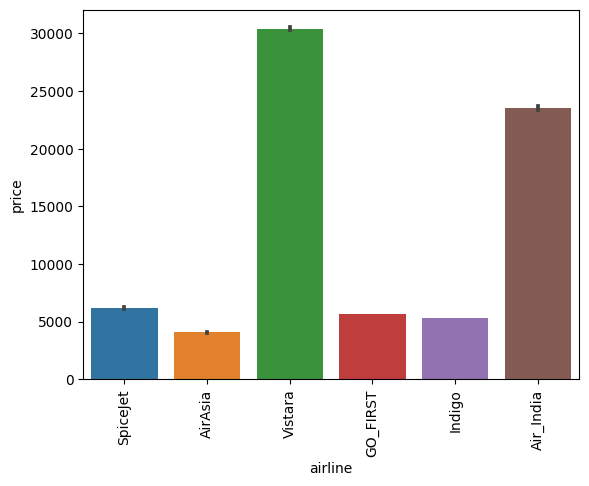

In [29]:
sns.barplot(x=df['airline'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [37]:
def airlinedetails(text):
    if text == 'GO_FIRST' or text == 'AirAsia' or text == 'SpiceJet':
         return 'other'

    else:
          return text

In [38]:
data['airline']=df['airline'].apply(airlinedetails)

In [39]:
data.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,one,zero,other
0,other,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953,0,1,0
1,other,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953,0,1,0
2,other,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1,0
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,0
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955,0,1,0


In [40]:
X = data.drop(columns=['price'])
y = np.log(data['price'])

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
xtrain

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,one,zero,other
298245,Vistara,Chennai,Morning,Afternoon,Hyderabad,Business,26.50,7,1,0,0
210650,Air_India,Delhi,Morning,Morning,Mumbai,Business,25.08,38,1,0,0
38033,Air_India,Delhi,Morning,Morning,Chennai,Economy,25.92,20,1,0,0
270667,Vistara,Kolkata,Morning,Early_Morning,Hyderabad,Business,21.42,11,1,0,0
248464,Vistara,Bangalore,Early_Morning,Evening,Delhi,Business,10.25,47,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
119879,Vistara,Kolkata,Evening,Afternoon,Delhi,Economy,20.50,2,1,0,0
259178,Vistara,Bangalore,Night,Night,Chennai,Business,25.42,7,1,0,0
131932,Air_India,Kolkata,Night,Morning,Mumbai,Economy,13.67,29,1,0,0
146867,other,Kolkata,Afternoon,Night,Hyderabad,Economy,8.33,39,1,0,0


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [46]:
from sklearn.preprocessing import RobustScaler as rs

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4]),
      ('col_tnf2',OrdinalEncoder(categories=[['Business','Economy']]),[5])
],remainder='passthrough')



step2=LinearRegression()



pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9108727970138741
MAE 0.26112795595280136


In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5])],remainder='passthrough')


step2 = Lasso(alpha=0.0001,random_state=42)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9108616083358846
MAE 0.2611471257139863


In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5])],remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=8,random_state=42)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9461645532431786
MAE 0.18455618754533287


In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5])],remainder='passthrough')


step2 = AdaBoostRegressor(n_estimators=25,learning_rate=0.1)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9173699093482606
MAE 0.2368530007050094


In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4]),
      ('col_tnf2',OrdinalEncoder(categories=[['Business','Economy']]),[5])
],remainder='passthrough')


step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9612298646211757
MAE 0.1591873248102238


In [70]:

from lightgbm import LGBMRegressor

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5])],remainder='passthrough')


step2 = LGBMRegressor(verbose=-1)


pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(xtrain,ytrain)

ypred= pipe.predict(xtest)


print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))

R2 score 0.9606428974740605
MAE 0.16187829764999542
